# **Introdução à Ciência de Dados**

**Professor**: Yuri Malheiros

**Grupo**: João Victor Alcoforado de Araújo, Lívia Noêmia Morais Rocha e Matheus Rocha dos Santos Rangel.

## **Projeto #3 - Visualização de Dados**

#### **Imports e configurações gerais**

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
pd.set_option('max_colwidth', None)

In [3]:
sns.set_palette("Set2")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Exploração Inicial - CNVCC**

[Dicionário de dados do dataset](https://opendatasus.saude.gov.br/dataset/b772ee55-07cd-44d8-958f-b12edd004e0b/resource/38ead83d-b115-4219-852e-7244792bc311/download/dicionario-de-dados-vacinacao.pdf)

In [91]:
cnvcc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICD/Datasets/CNVCC - Nordeste1.csv')

In [92]:
cnvcc['vacina_dataAplicacao'] = pd.to_datetime(cnvcc['vacina_dataAplicacao'].str[:10])
cnvcc = cnvcc[cnvcc['vacina_dataAplicacao'] > pd.to_datetime('03/01/2021', dayfirst=True)]

In [93]:
cnvcc.head()

,document_id,paciente_id,paciente_idade,paciente_enumSexoBiologico,estabelecimento_uf,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome
0,ddc87995-000b-47a1-b90e-6b0d0563f978-i0b0,6b16f0c5e10a74e22ad7f043d723f475cf6b1f349db2d159965d2b76eee68964,23.0,F,MA,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-04-30,1ª Dose,Vacina Covid-19 - Covishield
1,7b8f308b-b027-4e31-a6c9-1352df60e0c0-i0b0,d7390505c9f33725adf5af0de73e5924bdd4db1154b3ad9960902207e71dacee,73.0,F,MA,Faixa Etária,FUNDACAO BUTANTAN,2021-03-11,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan
2,a9410084-eadf-449e-9d8c-fb6cb7f8a719-i0b0,3aec5e352cba8ad396136966088797ec45e9b29aebd136bb744164da0bffa571,61.0,F,MA,Faixa Etária,FUNDACAO OSWALDO CRUZ,2021-04-29,1ª Dose,Vacina Covid-19 - Covishield
3,45373304-db08-47c9-9174-9cc2a53110b4-i0b0,fafb9a784ebdf54d418b37c1b0e0260cf371c16ead72c6cbafff9fd8c196a00e,23.0,F,MA,Povos Indígenas,FUNDACAO BUTANTAN,2021-03-12,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan
4,e8b44e85-890d-4e5f-a286-6d1f1b26fba7-i0b0,1b518f76d0415ffdb07e65f875db7f6a8a6ec741748375818a635a4182463620,70.0,F,MA,Faixa Etária,FUNDACAO BUTANTAN,2021-04-29,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan


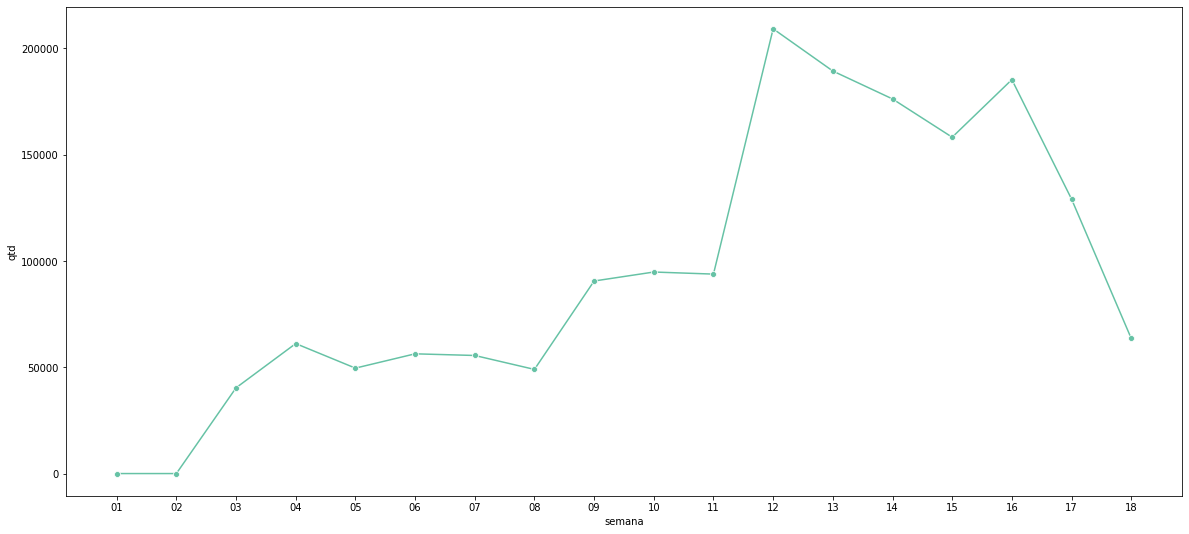

In [96]:
vacinados = cnvcc.groupby('vacina_dataAplicacao').size().reset_index(name='qtd')
vacinados['semana'] = vacinados['vacina_dataAplicacao'].dt.strftime("%U")

plt.figure(figsize=(20,9))
sns.lineplot(data = vacinados, x='semana',y='qtd', marker='o', ci= None)

## **Visualização de Dados - SRAG**

[Dicionário de dados do dataset](https://opendatasus.saude.gov.br/dataset/9f76e80f-a2f1-4662-9e37-71084eae23e3/resource/b3321e55-24e9-49ab-8651-29cf5c8f3179/download/dicionario-de-dados-srag-hospitalizado-27.07.2020-final.pdf)

In [12]:
srag = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICD/Datasets/SRAG - 2021.csv')

#Seleção de estados do nordeste
nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
srag = srag[srag['SG_UF'].isin(nordeste)]

In [14]:
#Conversao em datetime
srag['DT_INTERNA'] = pd.to_datetime(srag['DT_INTERNA'],errors='coerce', dayfirst=True)
srag['DT_EVOLUCA'] = pd.to_datetime(srag['DT_EVOLUCA'],errors='coerce', dayfirst=True)
srag['DT_ENTUTI']  = pd.to_datetime(srag['DT_ENTUTI'],errors='coerce', dayfirst=True)
srag['DT_SAIDUTI'] = pd.to_datetime(srag['DT_SAIDUTI'],errors='coerce', dayfirst=True)

In [16]:
#Criacao de novas colunas
srag["TEMPO_INTER"] = ((srag["DT_EVOLUCA"] - srag["DT_INTERNA"]).dt.days).astype("Int64")
srag["TEMPO_UTI"] = ((srag["DT_SAIDUTI"] - srag["DT_ENTUTI"]).dt.days).astype("Int64")

In [17]:
srag.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,CS_SEXO,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_ESCOL_N,SG_UF,SURTO_SG,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,HOSPITAL,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TEMPO_INTER,TEMPO_UTI
1,06/01/2021,1,03/01/2021,F,80,3,5,NaN,PE,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,S,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2021-01-05,2.0,NaT,NaT,2.0,5.0,2.0,2021-01-13,NaN,NaN,NaN,NaN,8,<NA>
4,08/01/2021,1,04/01/2021,F,1,3,6,5.0,PB,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2021-01-08,2.0,NaT,NaT,3.0,5.0,1.0,2021-01-10,2.0,2.0,2.0,2.0,2,<NA>
6,11/01/2021,2,05/01/2021,F,68,3,5,9.0,BA,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,S,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2021-01-09,1.0,2021-01-09,2021-01-19,3.0,4.0,1.0,2021-01-25,2.0,2.0,2.0,2.0,16,10
12,14/04/2021,15,12/04/2021,M,87,3,6,9.0,BA,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,S,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2021-04-05,2.0,NaT,NaT,3.0,4.0,NaN,NaT,2.0,2.0,2.0,2.0,<NA>,<NA>
25,03/01/2021,1,03/01/2021,F,54,3,5,NaN,AL,9.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,S,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,2021-01-03,NaN,NaT,NaT,NaN,5.0,1.0,2021-01-14,NaN,NaN,NaN,NaN,11,<NA>


### Evolução do número de óbitos por Covid-19 por semana de notificação

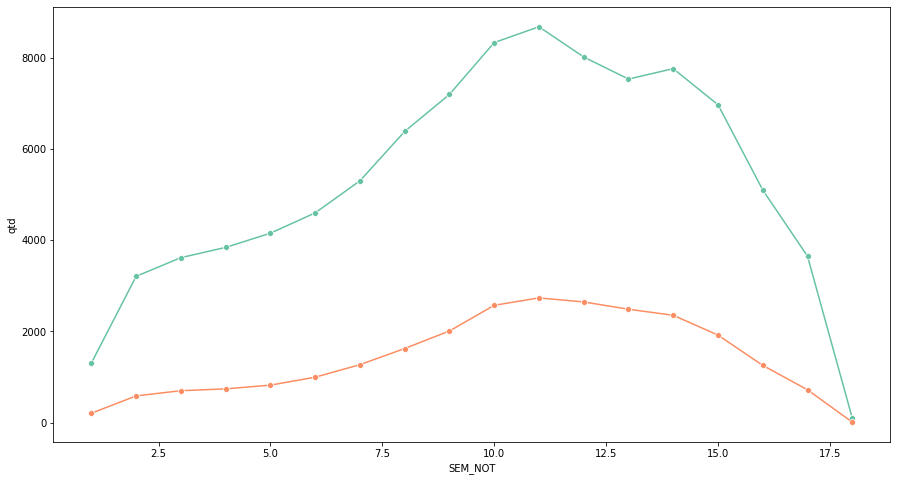

In [58]:
not_por_semana = pd.DataFrame(srag.groupby("SEM_NOT").size().reset_index(name="qtd")) 

obitos_covid = srag.loc[(srag['CLASSI_FIN'] == 5) & (srag["EVOLUCAO"] == 2)][['EVOLUCAO', 'SEM_NOT']]
obitos_covid_por_semana = obitos_covid.groupby(["EVOLUCAO", "SEM_NOT"]).size().reset_index(name="qtd")

fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=not_por_semana, x="SEM_NOT", y ="qtd", marker='o')
sns.lineplot(data=obitos_covid_por_semana, x="SEM_NOT", y="qtd", marker='o')

### Proporção de notificação de SRAG por estado do nordeste

In [66]:
dados = {
    'SG_UF': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'populacao': [3322820, 14812617, 9075649, 7035055, 3996496,
                  9496294, 3264531, 3479010, 2278308]
 }
pop_estados = pd.DataFrame(dados)

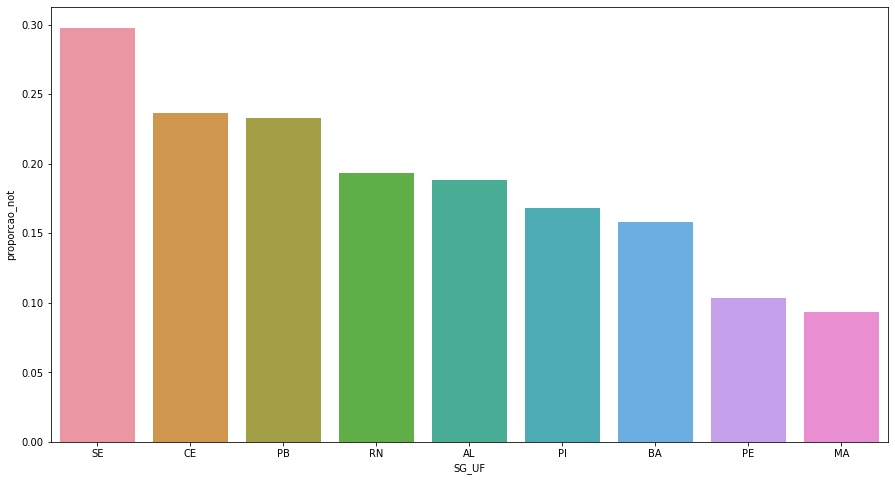

In [79]:
not_por_estado = srag.groupby('SG_UF').size().reset_index(name='qtd')
not_por_estado = pd.merge(proporcao_not_estado, pop_estados, on='SG_UF', how='inner')
not_por_estado['proporcao_not'] =  (not_por_estado['qtd']/not_por_estado['populacao']) * 100
not_por_estado = not_por_estado.sort_values('proporcao_not', ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(data=not_por_estado, x='SG_UF', y='proporcao_not')

#### Frequência relativa de sintomas de pacientes com Covid - 19

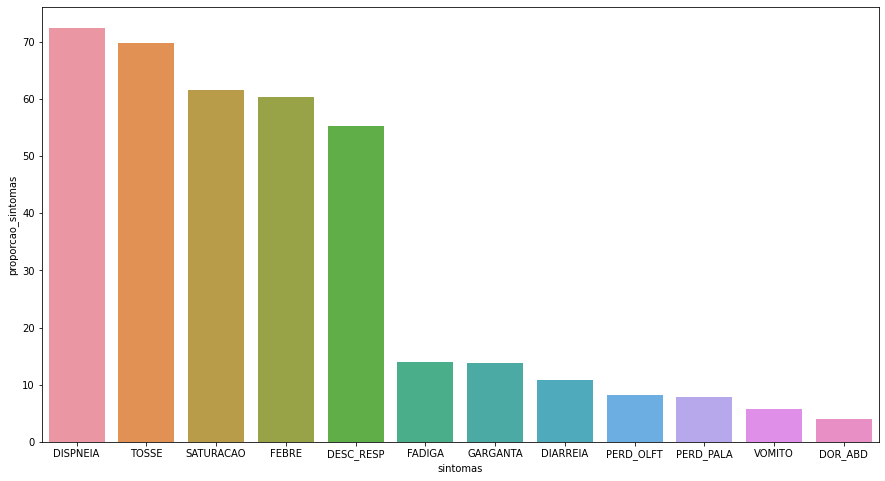

In [90]:
coluna_sintomas = ['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']
pacientes_covid = srag[srag['CLASSI_FIN'] == 5][coluna_sintomas]
total_pacientes = pacientes_covid.shape[0]

proporcao_sintomas = []
for sintoma in coluna_sintomas:
    freq_sintoma = pacientes_covid[pacientes_covid[sintoma] == 1].shape[0]
    proporcao_sintomas.append((freq_sintoma/total_pacientes) * 100)

freq_sintomas = pd.DataFrame({'sintomas': coluna_sintomas, 'proporcao_sintomas': proporcao_sintomas})
freq_sintomas = freq_sintomas.sort_values('proporcao_sintomas', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(data=freq_sintomas, x="sintomas", y="proporcao_sintomas")

In [86]:
total_pacientes

76063

#### Histograma de idade dos pacientes notificados 

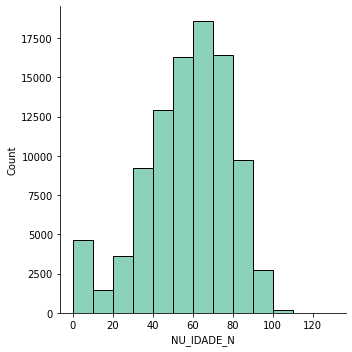

In [80]:
sns.displot(data=srag, x="NU_IDADE_N", binwidth=10)